# Support Vector Machine Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Import the admissions data set (admissions.csv).

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


## Data Exploration

Before jumping into training a model on the data, let's explore it to get a better sense of the relationships between our features and the target variable.

### Call the Pandas `describe()` method on the data frame to get view the average values and variability for each variable.

In [3]:
data.describe()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.617500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.486606
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


### Group the data by the Admitted field and compute the average values for each field.

In [4]:
data.groupby(['Admitted']).mean()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research
Admitted,,,,,,,
0,307.013072,102.588235,2.261438,2.741830,2.875817,8.087974,0.248366
1,322.874494,110.396761,3.599190,3.807692,3.809717,8.915425,0.732794


### How many students that applied were admitted vs. not admitted? What percentage of students were admitted vs. not admitted? 

In [5]:
#admitted = 1  / not admitted = 0
data['Admitted'].value_counts()

1    247
0    153
Name: Admitted, dtype: int64

In [6]:
#percentage of admitted vs not
data.Admitted.value_counts() / len(data)

1    0.6175
0    0.3825
Name: Admitted, dtype: float64

### What percent of students with research experience were admitted?

In [8]:
research = data[data['Research'] == 1]
research.Admitted.value_counts() / len(research)

1    0.826484
0    0.173516
Name: Admitted, dtype: float64

### What percent of students admitted had research experience?

In [12]:
data.Research.value_counts() / len(data)

1    0.5475
0    0.4525
Name: Research, dtype: float64

### Generate a grouped bar chart showing the number of admissions by SOP score, with separate bars for admitted and not admitted.

In [10]:
data['SOP'].nunique()

9

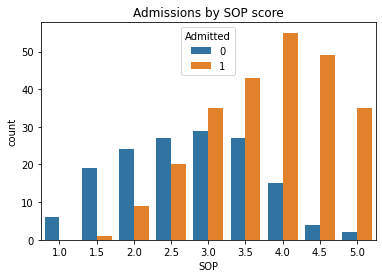

In [14]:
sns.countplot(x='SOP', hue='Admitted', data=data)
plt.title('Admissions by SOP score')
plt.show()

### Generate a grouped bar chart showing the number of admissions by LOR score, with separate bars for admitted and not admitted.

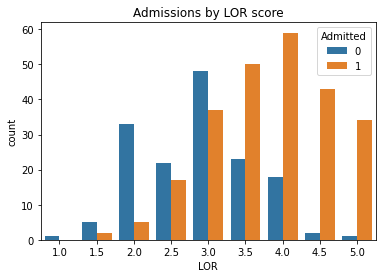

In [15]:
sns.countplot(x='LOR', hue='Admitted', data=data)
plt.title('Admissions by LOR score')
plt.show()

### Generate a scatter plot where the axes are GRE and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

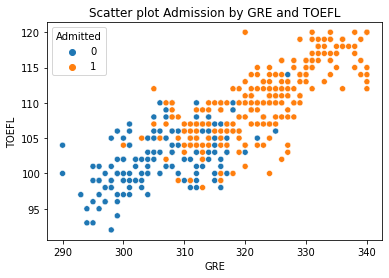

In [17]:
sns.scatterplot(data=data, x='GRE', y='TOEFL', hue='Admitted')
plt.title('Scatter plot Admission by GRE and TOEFL')
plt.show()

### Generate a scatter plot where the axes are GPA and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

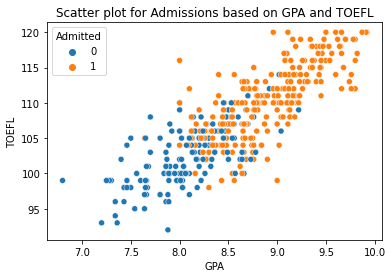

In [18]:
sns.scatterplot(x='GPA', y='TOEFL', hue='Admitted', data=data)
plt.title('Scatter plot for Admissions based on GPA and TOEFL')
plt.show()

### Generate a scatter plot where the axes are GRE and GPA fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

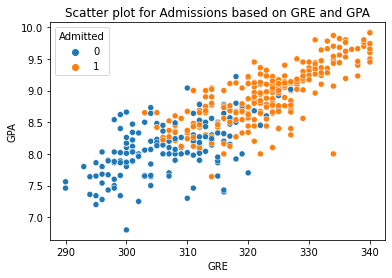

In [19]:
sns.scatterplot(x='GRE', y='GPA', hue='Admitted', data=data)
plt.title('Scatter plot for Admissions based on GRE and GPA')
plt.show()

## Model Training and Evaluation

Now that we have gained a sense of familiarity with our data, let's train a model to predict admissions.

### Split the data into a training and test sets, where the test set contains 20% of the data.

In [20]:
X = data.drop(['Admitted'], axis=1)
y = data['Admitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Use the linear kernel to train a Support Vector Classifier (SVC) model on the training data. Report the scores for both the training and test data.

In [21]:
#SVC with kernel='linear'
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

#scores for SVC
print('Train score: ', svm.score(X_train, y_train))
print('Test score: ', svm.score(X_test, y_test))

Train score:  0.890625
Test score:  0.8


### Generate a classification report for the SVC model you trained.

How do the evaluation metrics differ across classes?

In [26]:
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print('Classification report for Train:\n {}'.format(classification_report(y_train, y_train_pred)))
print('Classification report for Test:\n {}'.format(classification_report(y_test, y_test_pred)))

Classification report for Train:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       116
           1       0.91      0.92      0.91       204

    accuracy                           0.89       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.89      0.89      0.89       320

Classification report for Test:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        37
           1       0.81      0.81      0.81        43

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80

